In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from agents import BasicQLearningAgent, DeepQAgent, Taxi, SARSAAgent

from IPython.display import Image


2024-10-28 17:15:05.619478: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 17:15:05.628011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 17:15:05.637578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 17:15:05.640492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 17:15:05.648092: I tensorflow/core/platform/cpu_feature_guar

## Libs

- numpy
- matplotlib
- gym
- tensorflow / tensorflow[and-cuda]

## Documentations / References.

Documentation on gym / gymnasium can be found here: [https://gymnasium.farama.org/api/env/], it has good documentation on all the functions. - Do not use the one "showed" in exam paper: [https://www.gymlibrary.dev/index.html], since it has pretty bad documentation.

# [TASK-1] Overview of the Environment.

## Grid

The taxi can move on all nodes except $X$.

For each step it takes, it will be given $-1$ rewards, if successfully deliver passenger $+20$ reward points is granted. On failure on pickup and dropoff $-10$ reward points are granted.

$$
\begin{bmatrix}
\text{RED}_{11} & x_{12} & \text{X} & x_{14} & \text{GREEN}_{15} \\
x_{21} & x_{22} & \text{X} & x_{24} & x_{25} \\
x_{31} & x_{32} & x_{33} & x_{34} & x_{35} \\
x_{41} & \text{X} & x_{43} & x_{44} & x_{45} \\
\text{YELLOW}_{51} & \text{X} & x_53 & \text{BLUE}_{54} & x_{55}
\end{bmatrix}
$$

## Actions
0: move south

1: move north

2: move east

3: move west

4: pickup passenger

5: drop off passenger

## Observation space.

The taxi can dropoff passanger on (0)$\text{RED}_{11}$, (1)$\text{GREEN}_{15}$, (2)$\text{YELLOW}_{51}$, (3)$\text{BLUE}_{54}$.
That means that the passanger can be on all these stats, and additionally (4)$\text{in taxi}$.

The grid is **5x5** resulting in **25** different locations for the taxi.

$4_{destinations} * 5_{passanger_locations} * 25_{nodes} = 500_{states}$

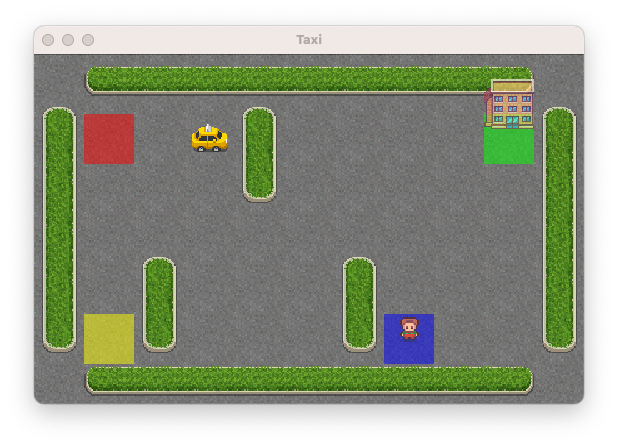

In [2]:
Image(filename='./static/SelfDrivingTaxi.png')

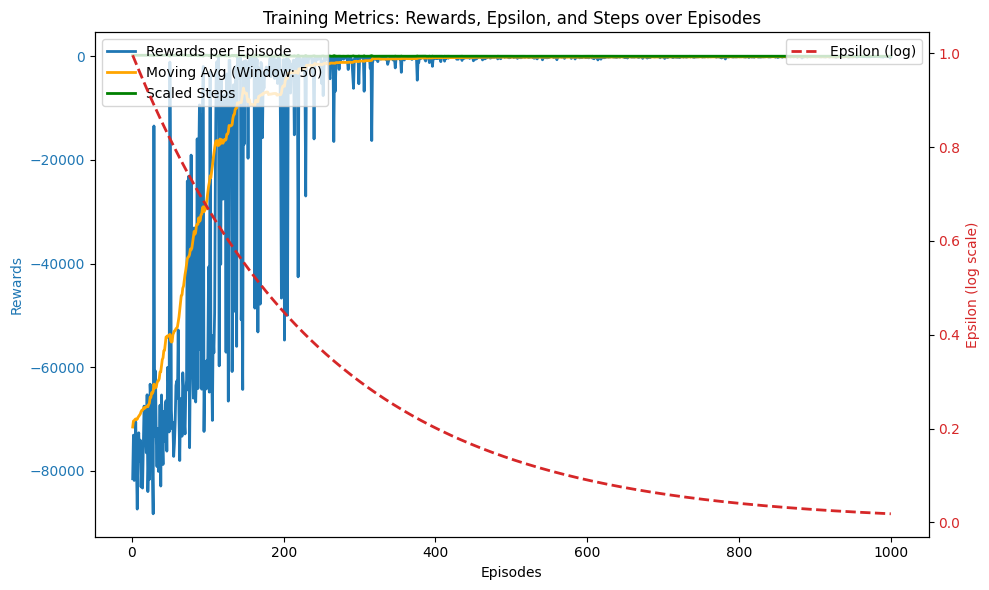

In [16]:
basic = BasicQLearningAgent(
    LEARNING_RATE=0.1,
    DISCOUNT_FACTOR=0.95,
    EPSILON=1.0,
    EPSILON_DECAY=0.996,
    EPSILON_MIN=0.01
)

Taxi.run(basic, n_episodes=1000, steps_per_episode=200, is_training=True)
basic.plot()


In [17]:
Taxi.run(basic, n_episodes=2, is_training=False)

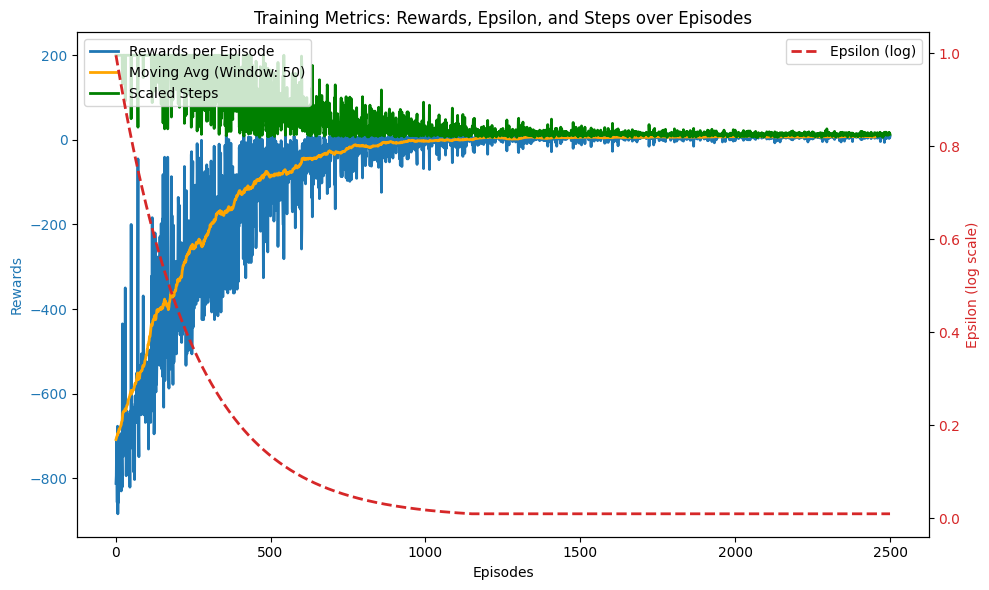

In [5]:
agent = SARSAAgent()
Taxi.run(agent, n_episodes=2500, steps_per_episode=1000, is_training=True)
agent.plot()
plt.show()